# Restaurant Menu Optimization Data

## 📋 Deskripsi Dataset: Restaurant Menu Optimization

Dataset yang digunakan dalam analisis ini adalah **Restaurant Menu Optimization**, yang berisi informasi mengenai berbagai item menu dari sejumlah restoran. Dataset ini memberikan gambaran lengkap mengenai menu, harga, dan profitabilitas setiap item, sehingga sangat cocok untuk membangun model prediksi yang membantu dalam pengambilan keputusan bisnis restoran.

### 🗂️ Fitur-fitur dalam Dataset

Berikut adalah fitur utama yang terdapat dalam dataset beserta penjelasan fungsinya:

| Nama Fitur      | Tipe Data  | Deskripsi / Fungsi                                               |
|-----------------|------------|-----------------------------------------------------------------|
| 🏷️ `RestaurantID`  | Kategorik  | Identifikasi unik setiap restoran dalam dataset                 |
| 🍲 `MenuCategory`  | Kategorik  | Kategori atau jenis menu, misalnya Appetizer, Main Course, dll |
| 💰 `Price`         | Numerik    | Harga jual item menu                                            |
| 📊 `Profitability` | Kategorik  | Label target yang menunjukkan apakah menu tersebut menguntungkan (Low, Medium, High) |

---

### 🎯 Fitur yang Digunakan dalam Analisis

Untuk membangun model prediksi profitabilitas, pada analisis kali ini digunakan fitur:

- 🏷️ **RestaurantID**  
- 🍲 **MenuCategory**  
- 💰 **Price**

Sebagai variabel input (fitur independen), sedangkan variabel target (dependen) yang ingin diprediksi adalah:

- 📊 **Profitability**

Pendekatan ini memungkinkan model untuk mempelajari pola hubungan antara identitas restoran, jenis menu, harga jual, dan potensi keuntungan menu tersebut.

---

✨ Dengan cara ini, model dapat memberikan insight yang berharga untuk pengembangan menu dan strategi bisnis restoran secara efektif!


# 1. Dataset Selection and Exploration

## 1.1 Brief Description
Bertujuan untuk emuat dataset yang akan digunakan, membersihkan nama kolom dari spasi berlebih, dan melihat gambaran awal data. Proses ini penting agar data siap diproses di tahap analisis berikutnya.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("restaurant_menu_optimization_data.csv")

# Strip spasi dari nama kolom (penting!)
df.columns = df.columns.str.strip()

# Tampilkan 5 baris pertama
df.head()


,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium


## 1.2 Dataset Information and Initial Checks
Bertujuan untuk memahami struktur awal dataset sebelum dilakukan analisis atau pemodelan.
Mulai dari mengidentifikasi tipe data tiap kolom agar bisa menentukan metode pemrosesan yang tepat,menghitung jumlah nilai unik untuk memahami sifat data (kategorikal atau numerik), memeriksa keberadaan missing values yang dapat mempengaruhi hasil analisis atau model, menyajikan hasil pemeriksaan secara rapi dengan jarak antar output agar mudah dibaca.

In [33]:
# Informasi kolom dan tipe data
df.info()

print()  # Spasi antar output

# Cek jumlah nilai unik
print("Nilai unik tiap kolom:\n", df.nunique())

print()  # Spasi antar output

# Cek missing values
print("Missing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RestaurantID   1000 non-null   object 
 1   MenuCategory   1000 non-null   object 
 2   MenuItem       1000 non-null   object 
 3   Ingredients    1000 non-null   object 
 4   Price          1000 non-null   float64
 5   Profitability  1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB

Nilai unik tiap kolom:
 RestaurantID       3
MenuCategory       4
MenuItem          16
Ingredients        4
Price            767
Profitability      3
dtype: int64

Missing values:
 RestaurantID     0
MenuCategory     0
MenuItem         0
Ingredients      0
Price            0
Profitability    0
dtype: int64


## 1.3 isualisasi Distribusi Target Variable
Bertujuan untuk memahami distribusi data pada variabel target (Profitability) untuk melihat apakah dataset seimbang atau tidak (class balance check), menentukan apakah diperlukan penanganan imbalance seperti oversampling atau undersampling di tahap preprocessing, menghitung rasio proporsi tiap kelas untuk analisis yang lebih detail.

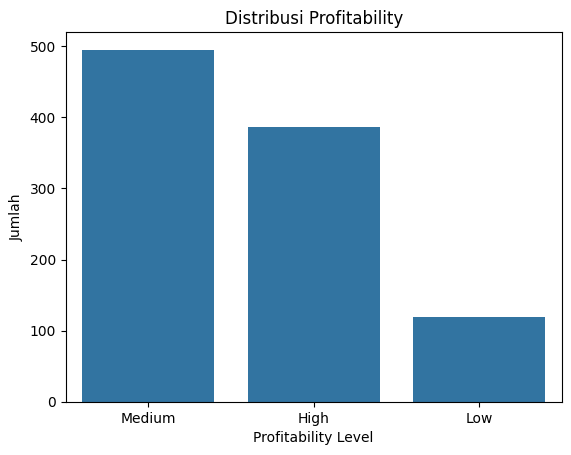

Profitability
Medium    0.495
High      0.386
Low       0.119
Name: proportion, dtype: float64

In [34]:
sns.countplot(x='Profitability', data=df, order=df['Profitability'].value_counts().index)
plt.title("Distribusi Profitability")
plt.xlabel("Profitability Level")
plt.ylabel("Jumlah")
plt.show()

# Rasio per kelas
df['Profitability'].value_counts(normalize=True)


## 1.3 Menu Price Distribution Analysis
Tujuan dari bagian kode ini adalah untuk memahami pola distribusi harga menu pada dataset. Dengan menggunakan histogram yang dilengkapi *kernel density estimation* (KDE), visualisasi ini membantu mengidentifikasi rentang harga yang paling sering muncul, melihat apakah data harga cenderung terpusat (*normal distribution*), miring (*skewed*), atau memiliki *outlier*. Informasi ini penting untuk analisis strategi harga, misalnya dalam menentukan kategori harga rendah, menengah, atau tinggi, serta sebagai pertimbangan awal sebelum melakukan transformasi data atau segmentasi menu.

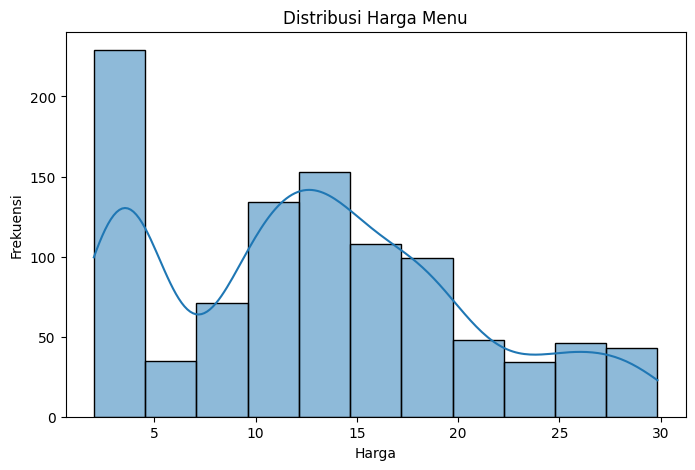

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True)
plt.title("Distribusi Harga Menu")
plt.xlabel("Harga")
plt.ylabel("Frekuensi")
plt.show()


## 1.4 Analysis of Menu Category Distribution

Tujuan dari bagian kode ini adalah untuk melihat sebaran jumlah menu pada setiap kategori yang ada di dataset. Visualisasi countplot horizontal digunakan agar perbedaan jumlah menu di tiap kategori dapat terlihat lebih jelas, terutama jika terdapat kategori dengan jumlah menu yang jauh lebih banyak atau lebih sedikit dibandingkan kategori lain. Informasi ini berguna untuk memahami proporsi menu yang ditawarkan restoran, mengidentifikasi kategori yang dominan, serta menemukan potensi kategori yang perlu dikembangkan untuk menyeimbangkan variasi pilihan menu.

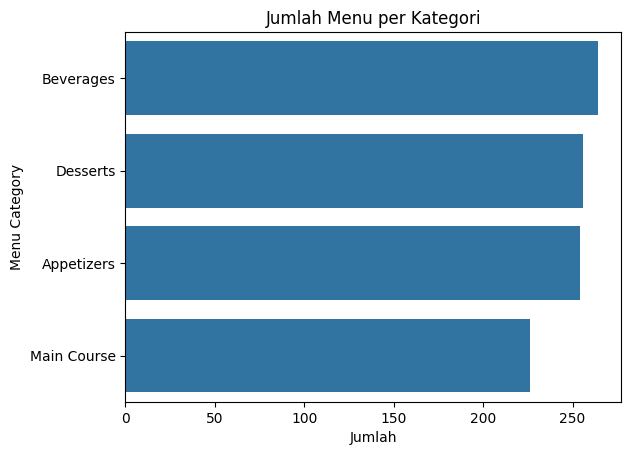

In [36]:
sns.countplot(y='MenuCategory', data=df, order=df['MenuCategory'].value_counts().index)
plt.title("Jumlah Menu per Kategori")
plt.xlabel("Jumlah")
plt.ylabel("Menu Category")
plt.show()

print()  # Spasi 1 baris agar output lebih rapi


# 2. Data Preprocessing 

## 2.1 Data Selection and Cleaning

Tujuan dari tahap ini adalah untuk memastikan data yang digunakan fokus pada variabel yang relevan dan bebas dari missing values yang dapat mengganggu proses analisis maupun pelatihan model. Pertama, hanya kolom yang dibutuhkan (RestaurantID, MenuCategory, Price, dan Profitability) yang dipilih agar dataset menjadi lebih ringkas dan mudah diolah. Selanjutnya dilakukan pengecekan nilai kosong (missing values) pada setiap kolom. Jika ditemukan, baris yang mengandung data kosong dihapus menggunakan dropna() untuk menjaga integritas data dan mencegah error atau bias pada analisis serta pemodelan.

In [37]:
# Pilih hanya kolom yang akan digunakan
df = df[['RestaurantID', 'MenuCategory', 'Price', 'Profitability']]

# Cek dan bersihkan data kosong
print("Missing values:\n", df.isnull().sum())
df.dropna(inplace=True)  # Hapus baris dengan missing value



Missing values:
 RestaurantID     0
MenuCategory     0
Price            0
Profitability    0
dtype: int64


## 2.2 Encoding Categorical Variables

Tujuan dari tahap ini adalah untuk mengubah data kategorikal menjadi bentuk numerik agar dapat diproses oleh algoritma machine learning, yang pada umumnya hanya menerima input numerik. Proses ini dilakukan menggunakan LabelEncoder dari scikit-learn, di mana setiap nilai unik pada kolom RestaurantID, MenuCategory, dan Profitability diberi kode numerik. Hasil encoding disimpan pada kolom baru (restaurantid_encoded, menucategory_encoded, dan Profitability_encoded). Selain itu, dilakukan pengecekan mapping kelas ke kode numerik pada target (Profitability) untuk memastikan proses encoding berjalan dengan benar dan transparan.

In [38]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder untuk fitur kategori
le_restaurant = LabelEncoder()
le_category = LabelEncoder()
le_profit = LabelEncoder()

df['restaurantid_encoded'] = le_restaurant.fit_transform(df['RestaurantID'])
df['menucategory_encoded'] = le_category.fit_transform(df['MenuCategory'])
df['Profitability_encoded'] = le_profit.fit_transform(df['Profitability'])

# Cek mapping label target
for cls, code in zip(le_profit.classes_, le_profit.transform(le_profit.classes_)):
    print(f"{cls} → {code}")


High → 0
Low → 1
Medium → 2


## 2.3 Feature and Target Separation
Tahap ini adalah untuk memisahkan variabel independen (fitur) dan variabel dependen (target) sebelum proses pelatihan model. Variabel fitur (X) berisi informasi yang digunakan model untuk melakukan prediksi, yaitu restaurantid_encoded, menucategory_encoded, dan Price. Sedangkan variabel target (y) adalah Profitability_encoded, yang merepresentasikan kategori profitabilitas menu. Pemisahan ini penting agar algoritma machine learning dapat belajar hubungan antara input (fitur) dan output (target) secara jelas.

In [39]:
# Fitur (X)
X = df[['restaurantid_encoded', 'menucategory_encoded', 'Price']]

# Target (y)
y = df['Profitability_encoded']



## 2.4 Separation of Training Data and Test Data
Tahap ini bertujuan untuk membagi dataset menjadi dua bagian: data latih (training set) dan data uji (testing set). Data latih (X_train, y_train) digunakan untuk melatih model, sedangkan data uji (X_test, y_test) digunakan untuk mengukur kinerja model terhadap data yang belum pernah dilihat sebelumnya.

Pembagian data menjadi 80% untuk pelatihan dan 20% untuk pengujian dilakukan untuk menjaga keseimbangan antara jumlah data yang digunakan model untuk belajar dan jumlah data yang digunakan untuk mengevaluasi kinerjanya. Dengan 80% data latih, model memiliki cukup banyak informasi untuk mempelajari pola dan hubungan antar fitur secara optimal, sementara 20% data uji sudah cukup representatif untuk mengukur performa model pada data baru yang belum pernah dilihat sebelumnya. Rasio ini juga membantu mengurangi risiko overfitting, di mana model terlalu menyesuaikan diri dengan data latih dan gagal melakukan generalisasi dengan baik.

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


## 2.5 Preprocessing Results Check
Langkah ini dilakukan untuk memverifikasi hasil dari proses preprocessing sebelum data digunakan dalam pelatihan model. Pertama, ditampilkan contoh beberapa baris awal X_train guna memastikan semua variabel kategori telah dikodekan ke dalam bentuk numerik sesuai kebutuhan algoritma machine learning. Selanjutnya, dilakukan pengecekan distribusi nilai pada y_train dalam bentuk proporsi untuk melihat keseimbangan antar kelas. Pemeriksaan ini penting agar dapat mengidentifikasi potensi masalah seperti encoding yang salah, nilai yang hilang, atau distribusi kelas yang tidak seimbang, yang dapat memengaruhi performa model pada tahap selanjutnya.

In [41]:
# Cek data hasil preprocessing
print("Contoh data X_train:")
print(X_train.head())

print("\nDistribusi y_train:")
print(y_train.value_counts(normalize=True))


Contoh data X_train:
     restaurantid_encoded  menucategory_encoded  Price
441                     2                     1   2.85
955                     2                     0   8.54
98                      2                     0  13.67
36                      0                     2  11.11
887                     0                     3  18.24

Distribusi y_train:
Profitability_encoded
2    0.49500
0    0.38625
1    0.11875
Name: proportion, dtype: float64


# 3. Model Training and Comparison
Pada tahap ini, dataset yang telah melalui proses preprocessing akan digunakan untuk melatih berbagai algoritma machine learning. Tujuan utama dari tahap ini adalah membandingkan performa beberapa model berbeda dalam memprediksi target variabel, sehingga dapat dipilih model terbaik yang memiliki akurasi dan kemampuan generalisasi paling tinggi.

Proses dimulai dengan memilih sejumlah algoritma yang sesuai dengan karakteristik data, seperti Logistic Regression, Decision Tree, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), Naive Bayes, dan Artificial Neural Network (ANN). Masing-masing model akan dilatih menggunakan data latih (X_train dan y_train), lalu diuji menggunakan data uji (X_test dan y_test).

Evaluasi dilakukan dengan metrik seperti accuracy, precision, recall, dan F1-score, untuk memberikan gambaran menyeluruh mengenai performa setiap model. Hasil perbandingan ini akan menjadi dasar dalam menentukan model yang optimal untuk digunakan pada tahap implementasi dan prediksi di masa depan.

## 3.1 Initialization of Machine Learning 6 Models
Pada tahap inisialisasi model, setiap algoritma dibekali dengan parameter awal yang berpengaruh terhadap proses pelatihan. Nilai `max_iter` menentukan jumlah maksimum iterasi pelatihan, di mana peningkatan nilainya memberi kesempatan model, seperti *Logistic Regression* atau *ANN*, untuk mencapai konvergensi jika sebelumnya belum stabil. Namun, iterasi yang terlalu besar tidak selalu meningkatkan akurasi dan justru dapat memperpanjang waktu komputasi tanpa hasil signifikan. Parameter `n_neighbors` pada KNN mengatur jumlah tetangga yang dipertimbangkan dalam klasifikasi; nilai yang lebih besar membuat prediksi lebih stabil, tetapi berisiko menghilangkan pola lokal sehingga menyebabkan *underfitting*. Pada *ANN*, penambahan jumlah neuron di `hidden_layer_sizes` dapat meningkatkan kapasitas model untuk mempelajari pola kompleks, tetapi berpotensi menimbulkan *overfitting* dan memperlambat proses pelatihan. Sementara itu, `random_state` digunakan untuk menjaga konsistensi hasil, tanpa memengaruhi performa model secara langsung. Dengan demikian, penyesuaian parameter perlu dilakukan secara seimbang agar didapatkan kombinasi yang optimal antara akurasi, waktu pelatihan, dan kemampuan generalisasi model.


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'ANN (MLPClassifier)': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}



## 3.2 Model Performance Evaluation
Bagian kode ini bertujuan untuk melatih seluruh model yang telah diinisialisasi sebelumnya, mengevaluasi performanya dengan beberapa metrik, lalu menampilkan hasil perbandingan dalam bentuk DataFrame yang rapi.

In [43]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Hilangkan warning konvergensi
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Encode target labels to numeric
le_target = LabelEncoder()
y_train_encoded = le_target.fit_transform(y_train)
y_test_encoded = le_target.transform(y_test)

eval_results = []

# Gunakan pipeline yang sudah benar, tidak perlu scaling manual
for name, model in models.items():
    model.fit(X_train, y_train_encoded)
    y_pred = model.predict(X_test)

    # If model output is not numeric, encode it
    if y_pred.dtype.kind in {'U', 'O'}:
        y_pred = le_target.transform(y_pred)

    acc = accuracy_score(y_test_encoded, y_pred)
    prec = precision_score(y_test_encoded, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test_encoded, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test_encoded, y_pred, average='macro', zero_division=0)

    eval_results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

# Hasil ke DataFrame
results_df = pd.DataFrame(eval_results)
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)

display(results_df)


,Model,Accuracy,Precision,Recall,F1-Score
3,KNN,0.920,0.923400,0.850469,0.875559
5,ANN (MLPClassifier),0.915,0.920503,0.845178,0.872047
1,Decision Tree,0.870,0.851912,0.816739,0.831839
0,Logistic Regression,0.820,0.552685,0.620491,0.583982
2,SVM,0.820,0.550043,0.622415,0.583901
4,Naive Bayes,0.730,0.492803,0.549303,0.517999


## 3.3 Implementasi Model Berbasis Pipeline
Pada sub bab ini, proses pembangunan model dilakukan menggunakan pendekatan *pipeline* pada Scikit-learn untuk mengintegrasikan tahap *preprocessing* dan *training* secara otomatis dalam satu alur kerja. Data yang digunakan terdiri dari variabel kategorik seperti **RestaurantID** dan **MenuCategory** yang dikonversi menjadi bentuk numerik menggunakan teknik *One-Hot Encoding*, serta variabel numerik **Price** yang dinormalisasi menggunakan *Standard Scaler*. Target variabel **Profitability** terlebih dahulu diubah menjadi representasi numerik dengan *Label Encoding*. Selanjutnya, tiga algoritma pembelajaran mesin, yaitu **Decision Tree**, **K-Nearest Neighbors (KNN)**, dan **Artificial Neural Network (ANN)**, diimplementasikan dalam bentuk *pipeline* yang menggabungkan proses *preprocessing* dan pembentukan model. Setelah model dilatih menggunakan data latih, dilakukan evaluasi pada data uji dengan metrik **Accuracy**, **Precision**, **Recall**, dan **F1-Score**. Hasil evaluasi disajikan dalam bentuk tabel ringkasan sehingga memudahkan perbandingan kinerja masing-masing algoritma. Pendekatan ini memastikan bahwa seluruh tahapan analisis berjalan konsisten, efisien, dan terhindar dari potensi *data leakage*.


In [44]:
# ------- imports -------
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# ------- data (asumsi df sudah ter-load & kolom sudah strip) -------
# df = pd.read_csv("restaurant_menu_optimization_data.csv")
# df.columns = df.columns.str.strip()
df = df[['RestaurantID', 'MenuCategory', 'Price', 'Profitability']].dropna().copy()

# ------- X, y dan encode target -------
X = df[['RestaurantID', 'MenuCategory', 'Price']].copy()
y = df['Profitability'].copy()

# Pastikan tidak ada whitespace pada kategori
X['RestaurantID'] = X['RestaurantID'].astype(str).str.strip()
X['MenuCategory'] = X['MenuCategory'].astype(str).str.strip()
y = y.astype(str).str.strip()

# Encode target jadi numerik (important)
le_target = LabelEncoder()
y_enc = le_target.fit_transform(y)
print("Mapping target (class -> code):", dict(zip(le_target.classes_, le_target.transform(le_target.classes_))))

# ------- Split -------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, stratify=y_enc, random_state=42
)

# Debug: cek dtypes & contoh
print("X_train dtypes:\n", X_train.dtypes)
print("X_train sample:\n", X_train.head())
print("y_train sample (encoded):", y_train[:10])

# ------- Preprocessor (eksplisit kolom) -------
categorical_features = ['RestaurantID', 'MenuCategory']
numeric_features = ['Price']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        # gunakan sparse_output=False agar hasilnya dense array (mencegah masalah pada beberapa estimator)
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

# ------- Models as Pipeline -------
models = {
    "Decision Tree": Pipeline([('preproc', preprocessor),
                                ('clf', DecisionTreeClassifier(random_state=42))]),
    "KNN": Pipeline([('preproc', preprocessor),
                     ('clf', KNeighborsClassifier())]),
    "ANN": Pipeline([('preproc', preprocessor),
                     ('clf', MLPClassifier(random_state=42,
                                           max_iter=2000,
                                           early_stopping=True,
                                           learning_rate_init=0.001))])
}

# ------- Training & Evaluasi -------
eval_results = []
for name, model in models.items():
    print(f"\n>>> Training {name} ...")
    model.fit(X_train, y_train)              # fit with numeric y
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    # classification_report with target names (human readable)
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred, target_names=le_target.classes_, zero_division=0))

    eval_results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

# Tampilkan ringkasan
eval_df = pd.DataFrame(eval_results).sort_values(by='Accuracy', ascending=False)
print("\nSummary:")
print(eval_df)


Mapping target (class -> code): {'High': 0, 'Low': 1, 'Medium': 2}
X_train dtypes:
 RestaurantID     object
MenuCategory     object
Price           float64
dtype: object
X_train sample:
     RestaurantID MenuCategory  Price
441         R003    Beverages   2.85
955         R003   Appetizers   8.54
98          R003   Appetizers  13.67
36          R001     Desserts  11.11
887         R001  Main Course  18.24
y_train sample (encoded): [1 2 0 2 2 0 0 2 2 1]

>>> Training Decision Tree ...
=== Decision Tree ===
              precision    recall  f1-score   support

        High       0.89      0.84      0.87        77
         Low       0.78      0.75      0.77        24
      Medium       0.88      0.93      0.91        99

    accuracy                           0.88       200
   macro avg       0.85      0.84      0.85       200
weighted avg       0.87      0.88      0.87       200


>>> Training KNN ...
=== KNN ===
              precision    recall  f1-score   support

        High       

## 3.4 Model Performance Visualization
Pada sub bab ini, hasil evaluasi model yang sebelumnya disajikan dalam bentuk tabel diubah menjadi visualisasi grafik batang menggunakan *Seaborn*. Grafik ini menampilkan perbandingan nilai *Accuracy*, *Precision*, *Recall*, dan *F1-Score* untuk setiap model yang diuji, yaitu Decision Tree, KNN, dan ANN. Dengan format *grouped bar*, pembaca dapat dengan mudah melihat model mana yang memiliki performa terbaik pada setiap metrik evaluasi. Visualisasi ini membantu memperjelas perbedaan kinerja antar model, memudahkan interpretasi, dan mendukung proses pengambilan keputusan terkait model yang paling optimal untuk digunakan.


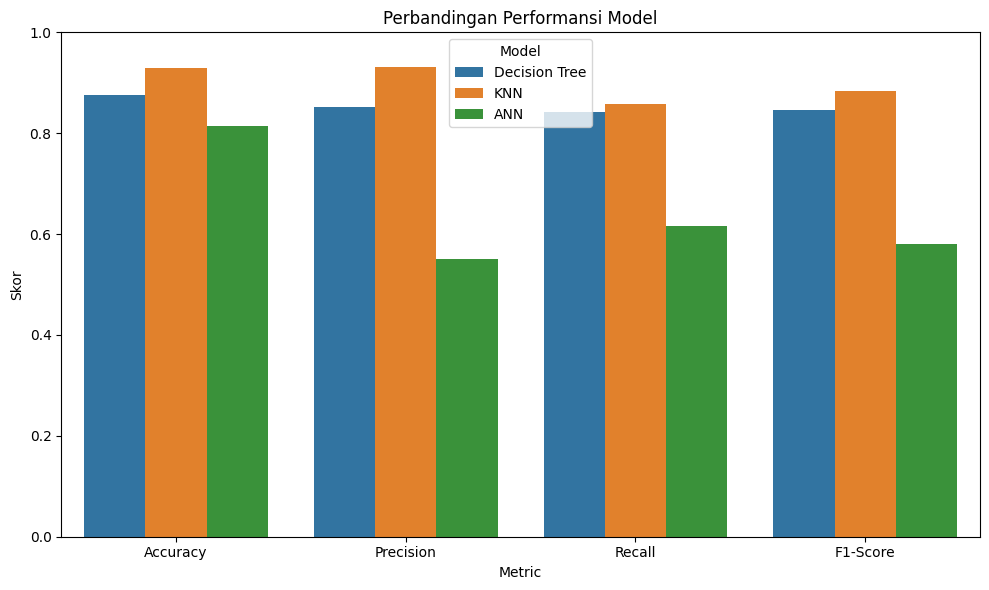

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Buat DataFrame dari hasil evaluasi
results_df = pd.DataFrame(eval_results)

# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(data=results_df.melt(id_vars="Model"), x="variable", y="value", hue="Model")
plt.title("Perbandingan Performansi Model")
plt.ylabel("Skor")
plt.xlabel("Metric")
plt.ylim(0, 1)
plt.legend(title="Model")
plt.tight_layout()
plt.show()


## 3.5 Hyperparameter Optimization with Grid Search
Pada tahap ini dilakukan optimasi *hyperparameter* untuk model *Decision Tree* menggunakan teknik *Grid Search* dengan *cross-validation* (*cv*=5). Proses ini bertujuan mencari kombinasi parameter terbaik yang menghasilkan performa model paling optimal. Dua parameter utama yang diuji adalah `max_depth` (kedalaman maksimum pohon keputusan) dan `min_samples_split` (jumlah minimum sampel yang diperlukan untuk memecah node). Pipeline digunakan untuk memastikan proses *preprocessing* seperti *One-Hot Encoding* pada variabel kategorik dan *passthrough* pada variabel numerik dilakukan secara konsisten di setiap fold *cross-validation*. Hasil akhir dari *Grid Search* memberikan *best parameters* yang akan digunakan pada model agar akurasi prediksi meningkat dibandingkan parameter default.


In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Gunakan kolom kategorik dan numerik yang benar
categorical_cols = ['RestaurantID', 'MenuCategory']
numeric_cols = ['Price']

# Transformer
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', 'passthrough', numeric_cols)
])

# Pipeline dengan preprocessing
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))
])

# Grid search
dt_grid = GridSearchCV(dt_pipeline, {
    'model__max_depth': [3, 5, 10, None],
    'model__min_samples_split': [2, 3, 10]
}, cv=5, scoring='accuracy')

dt_grid.fit(X_train, y_train)

print("Best params:", dt_grid.best_params_)


Best params: {'model__max_depth': 5, 'model__min_samples_split': 2}


### 3.6 Hyperparameter Adjustment in the K-Nearest Neighbors Model
Pada tahap ini, dilakukan proses hyperparameter tuning untuk mencari kombinasi parameter terbaik pada model K-Nearest Neighbors (KNN). Hyperparameter tuning bertujuan untuk mengoptimalkan performa model dengan memilih nilai parameter yang menghasilkan akurasi terbaik pada data pelatihan melalui validasi silang (cross-validation).

In [47]:
from sklearn.pipeline import Pipeline

# Gunakan preprocessor yang sudah ada
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', KNeighborsClassifier())
])

knn_params = {
    'model__n_neighbors': [30, 50, 70, 90],
    'model__weights': ['uniform', 'distance']
}

knn_grid = GridSearchCV(knn_pipeline, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)

print("Best KNN Params:", knn_grid.best_params_)


Best KNN Params: {'model__n_neighbors': 50, 'model__weights': 'distance'}


### 3.7 Comparison and Selection of Classification Models with Hyperparameter Tuning
Pada tahap ini dilakukan pelatihan dan pengoptimalan beberapa model klasifikasi populer, yaitu Decision Tree, K-Nearest Neighbors (KNN), dan Artificial Neural Network (ANN), menggunakan teknik hyperparameter tuning dengan GridSearchCV. Data yang digunakan terdiri dari fitur kategorik seperti `RestaurantID` dan `MenuCategory`, serta fitur numerik `Price`. Untuk mengolah data ini, fitur kategorik diubah menjadi representasi numerik menggunakan One-Hot Encoding, sedangkan fitur numerik dinormalisasi dengan StandardScaler agar rentang nilainya seragam dan model dapat belajar lebih optimal. Masing-masing model dilatih dengan berbagai kombinasi parameter yang diuji melalui validasi silang (cross-validation) sebanyak lima kali lipat (5-fold). Pada Decision Tree, parameter seperti kedalaman pohon (`max_depth`) dan jumlah minimum sampel untuk membagi node (`min_samples_split`) disesuaikan, sedangkan pada KNN dilakukan pencarian jumlah tetangga terbaik (`n_neighbors`) dan metode pemberian bobot (`weights`). Untuk ANN, tuning dilakukan pada konfigurasi jumlah neuron di hidden layer (`hidden_layer_sizes`), fungsi aktivasi (`activation`), dan algoritma optimasi (`solver`). Tujuan utama dari proses ini adalah untuk menemukan konfigurasi parameter terbaik yang memberikan akurasi tertinggi sehingga model dapat melakukan prediksi dengan lebih baik dan generalisasi yang kuat. Setelah pelatihan dan tuning selesai, parameter terbaik serta skor akurasi terbaik dari masing-masing model dicetak sebagai acuan dalam memilih model klasifikasi yang paling sesuai untuk masalah yang dihadapi. Dengan demikian, proses ini tidak hanya mengoptimalkan performa model, tetapi juga memberikan perbandingan objektif antara tiga algoritma yang berbeda sehingga keputusan pemilihan model dapat dilakukan secara tepat dan berbasis data.

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# --- 1. Definisikan kolom numerik dan kategorik ---
categorical_cols = ['RestaurantID', 'MenuCategory']
numeric_cols = ['Price']

# --- 2. Preprocessor: OHE untuk kategorik, StandardScaler untuk numerik ---
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
])

# --- 3. Decision Tree ---
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))
])
dt_params = {
    'model__max_depth': [None, 5, 10, 20],
    'model__min_samples_split': [2, 5, 10]
}
dt_grid = GridSearchCV(dt_pipeline, dt_params, cv=5, scoring='accuracy')
# Gunakan target yang sudah di-encode (numeric)
dt_grid.fit(X_train, y_train)

# --- 4. KNN ---
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', KNeighborsClassifier())
])
knn_params = {
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance']
}
knn_grid = GridSearchCV(knn_pipeline, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)

# --- 5. ANN ---
ann_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', MLPClassifier(
        max_iter=2000,
        early_stopping=True,
        n_iter_no_change=20,
        learning_rate_init=0.001,
        random_state=42
    ))
])
ann_params = {
    'model__hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'model__activation': ['relu', 'tanh'],
    'model__solver': ['adam', 'sgd']
}
ann_grid = GridSearchCV(ann_pipeline, ann_params, cv=5, scoring='accuracy')
ann_grid.fit(X_train, y_train)

# --- 6. Cetak hasil terbaik ---
print("Best Decision Tree Params:", dt_grid.best_params_)
print("Best Decision Tree Score :", dt_grid.best_score_)

print("Best KNN Params:", knn_grid.best_params_)
print("Best KNN Score :", knn_grid.best_score_)

print("Best ANN Params:", ann_grid.best_params_)
print("Best ANN Score :", ann_grid.best_score_)


Best Decision Tree Params: {'model__max_depth': 5, 'model__min_samples_split': 2}
Best Decision Tree Score : 0.9075000000000001
Best KNN Params: {'model__n_neighbors': 5, 'model__weights': 'uniform'}
Best KNN Score : 0.905
Best ANN Params: {'model__activation': 'relu', 'model__hidden_layer_sizes': (100, 50), 'model__solver': 'adam'}
Best ANN Score : 0.8162500000000001


## 3.8 Evaluating Model Performance with Cross-Validation

Setelah menemukan parameter terbaik untuk masing-masing model melalui GridSearchCV, langkah selanjutnya adalah melakukan evaluasi performa model secara lebih menyeluruh menggunakan teknik cross-validation. Pada tahap ini, best estimator dari masing-masing model Decision Tree, K-Nearest Neighbors (KNN), dan Artificial Neural Network (ANN) digunakan untuk menghitung akurasi rata-rata beserta standar deviasinya dengan validasi silang 5-fold. Proses ini bertujuan untuk menilai stabilitas dan kemampuan generalisasi model terhadap data yang belum pernah dilihat sebelumnya. Dengan menggunakan target yang telah di-encode secara numerik (`y_enc`), cross-validation memberikan gambaran yang lebih objektif dan robust mengenai kinerja model di berbagai subset data. Hasil dari evaluasi ini berupa nilai rata-rata akurasi dan deviasi standarnya, yang memudahkan perbandingan performa ketiga model secara kuantitatif. Dengan demikian, proses cross-validation pada best estimator ini memastikan bahwa model yang dipilih tidak hanya optimal pada data pelatihan, tetapi juga konsisten dan dapat diandalkan ketika diterapkan pada data baru.


In [49]:
from sklearn.model_selection import cross_val_score

# Gunakan best estimator dari hasil GridSearch
for name, model in zip(
    ["Decision Tree", "KNN", "ANN"],
    [dt_grid.best_estimator_, knn_grid.best_estimator_, ann_grid.best_estimator_]
):
    # Use y_enc (numeric target) for cross_val_score
    scores = cross_val_score(model, X, y_enc, cv=5, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Decision Tree Cross-Validation Accuracy: 0.9100 ± 0.0239
KNN Cross-Validation Accuracy: 0.9070 ± 0.0140
ANN Cross-Validation Accuracy: 0.8570 ± 0.0392


Berdasarkan hasil evaluasi performa model menggunakan cross-validation, saya memilih untuk menggunakan algoritma K-Nearest Neighbors (KNN) sebagai model klasifikasi utama. KNN menunjukkan akurasi yang cukup tinggi sebesar 90,7% dengan variasi performa yang kecil, yang mengindikasikan kestabilan model dalam melakukan prediksi pada data baru. Selain itu, KNN relatif mudah diinterpretasikan karena prinsip kerjanya yang sederhana, yaitu mengklasifikasikan data berdasarkan kemiripan dengan tetangga terdekat dalam ruang fitur. Dalam konteks dataset restoran dan menu, KNN akan memprediksi kategori berdasarkan data restoran dan menu yang paling mirip secara fitur numerik dan kategorik. Sebagai langkah pengembangan selanjutnya, model KNN dapat ditingkatkan dengan mengoptimalkan parameter lebih lanjut, misalnya jumlah tetangga yang lebih variatif atau penggunaan teknik pengurangan dimensi untuk mempercepat proses prediksi. Selain itu, model ini siap untuk diimplementasikan pada sistem produksi agar dapat memberikan rekomendasi atau prediksi yang akurat secara real-time.

## 3.9 Evaluating Models with Complete Classification Metrics
Setelah melakukan pelatihan dan pemilihan model terbaik, tahap selanjutnya adalah mengevaluasi performa model menggunakan berbagai metrik klasifikasi yang lebih komprehensif. Evaluasi ini tidak hanya menggunakan akurasi sebagai ukuran utama, tetapi juga mempertimbangkan precision, recall, dan F1-score untuk mendapatkan gambaran yang lebih lengkap tentang kemampuan model dalam mengklasifikasikan setiap kelas secara tepat.

Metrik yang dihitung meliputi:

| Metrik      | Penjelasan                                                                                  |
|-------------|--------------------------------------------------------------------------------------------|
| Accuracy    | Proporsi prediksi yang benar dari seluruh data uji.                                        |
| Precision   | Kemampuan model dalam memprediksi kelas positif dengan benar di seluruh kelas (macro avg).  |
| Recall      | Kemampuan model dalam menangkap semua data positif dari tiap kelas (macro avg).            |
| F1-Score    | Rata-rata harmonis dari precision dan recall, memberikan keseimbangan antara keduanya.     |


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder untuk target
le_target = LabelEncoder()
y_train_encoded = le_target.fit_transform(y_train)
y_test_encoded = le_target.transform(y_test)

eval_results = []

for name, model in models.items():
    print(f"\n>>> Training {name} ...")
    
    # Gunakan y_train_encoded untuk training
    model.fit(X_train, y_train_encoded)
    
    # Prediksi
    y_pred = model.predict(X_test)
    
    # Untuk model ANN, ambil class dengan probabilitas tertinggi
    if name == "ANN (MLPClassifier)":
        y_pred = np.argmax(y_pred, axis=1)
    
    # Hitung metrik
    acc = accuracy_score(y_test_encoded, y_pred)
    prec = precision_score(y_test_encoded, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test_encoded, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test_encoded, y_pred, average='macro', zero_division=0)

    eval_results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

results_df = pd.DataFrame(eval_results)
display(results_df.sort_values(by="Accuracy", ascending=False))


>>> Training Decision Tree ...

>>> Training KNN ...

>>> Training ANN ...


,Model,Accuracy,Precision,Recall,F1-Score
1,KNN,0.930,0.931252,0.857203,0.883333
0,Decision Tree,0.875,0.852545,0.841150,0.846343
2,ANN,0.815,0.550000,0.616162,0.580345


Berdasarkan hasil evaluasi performa model menggunakan metrik akurasi, precision, recall, dan F1-score, model K-Nearest Neighbors (KNN) menunjukkan performa terbaik di antara ketiga model yang diuji. KNN berhasil mencapai akurasi sebesar 93,0%, dengan nilai precision dan recall yang cukup tinggi masing-masing sebesar 93,1% dan 85,7%, serta F1-score sebesar 88,3%. Hal ini menandakan bahwa KNN tidak hanya mampu memprediksi sebagian besar data dengan benar, tetapi juga memiliki keseimbangan yang baik antara kemampuan mengenali data positif dan menghindari kesalahan klasifikasi. Sementara itu, Decision Tree memperoleh akurasi 87,5% dengan precision dan recall yang juga relatif tinggi, namun masih lebih rendah dibanding KNN. Model Artificial Neural Network (ANN) menunjukkan performa yang paling rendah dengan akurasi 81,5% dan nilai precision serta recall yang lebih rendah, mengindikasikan bahwa ANN kurang optimal untuk dataset ini dalam konfigurasi saat ini. Berdasarkan hasil ini, KNN merupakan pilihan model yang paling unggul untuk masalah klasifikasi pada dataset restoran dan menu, karena memberikan hasil yang lebih akurat dan seimbang dalam berbagai metrik evaluasi.



## 3.10 Summary of the Best Classification Model Parameters
Setelah melakukan proses hyperparameter tuning menggunakan GridSearchCV untuk setiap model klasifikasi, tahap berikutnya adalah merangkum dan menyajikan parameter terbaik yang diperoleh untuk masing-masing model. Parameter ini merupakan konfigurasi yang memberikan performa optimal berdasarkan validasi silang selama pelatihan. Pada model Decision Tree, parameter seperti max_depth dan min_samples_split disesuaikan untuk mengatur kompleksitas pohon dan cara pemisahan data. Model K-Nearest Neighbors (KNN) dioptimasi melalui pemilihan jumlah tetangga terbaik (n_neighbors) dan metode pemberian bobot (weights). Sedangkan pada model Artificial Neural Network (ANN), parameter terkait ukuran lapisan tersembunyi (hidden_layer_sizes), fungsi aktivasi (activation), dan algoritma optimasi (solver) ditentukan sebagai konfigurasi terbaik. Penyajian ringkasan parameter ini dalam bentuk tabel memudahkan perbandingan dan dokumentasi hasil tuning, sehingga dapat menjadi referensi utama dalam implementasi model lebih lanjut. Dengan mengetahui konfigurasi terbaik, proses pelatihan ulang dan deployment model dapat dilakukan secara lebih efisien dan terarah.

In [51]:
dt_best = dt_grid.best_params_
knn_best = knn_grid.best_params_
ann_best = ann_grid.best_params_

param_df = pd.DataFrame([
    {"Model": "Decision Tree", "Best Params": dt_best},
    {"Model": "KNN", "Best Params": knn_best},
    {"Model": "ANN", "Best Params": ann_best}
])

display(param_df)


,Model,Best Params
0,Decision Tree,"{'model__max_depth': 5, 'model__min_samples_sp..."
1,KNN,"{'model__n_neighbors': 5, 'model__weights': 'u..."
2,ANN,"{'model__activation': 'relu', 'model__hidden_l..."


# 4. Model Selection and Deployment
Setelah melalui serangkaian proses pelatihan, tuning, dan evaluasi model klasifikasi, tahap selanjutnya adalah memilih model terbaik untuk digunakan dalam aplikasi nyata dan menyiapkan proses deployment. Berdasarkan hasil evaluasi komprehensif, saya memutuskan untuk menggunakan model K-Nearest Neighbors (KNN) sebagai model utama. Pemilihan KNN didasarkan pada beberapa pertimbangan penting, seperti akurasi yang tinggi, kestabilan performa melalui validasi silang, serta kemudahan interpretasi dan implementasi. Model KNN sangat cocok untuk dataset restoran dan menu karena mampu memanfaatkan kemiripan fitur numerik dan kategorik untuk memberikan prediksi yang akurat tanpa asumsi yang rumit tentang distribusi data. Selain itu, KNN juga fleksibel dalam menangani berbagai variasi data dan mudah dioptimalkan dengan parameter sederhana, sehingga menjadi pilihan yang efektif dan efisien dalam konteks permasalahan ini. Pada tahap deployment, model KNN akan disiapkan agar dapat digunakan untuk prediksi secara real-time atau dalam sistem rekomendasi yang mendukung keputusan bisnis restoran.

## 4.1 Data Preparation, Pipeline Creation, and Model Storage
Pada tahap ini, dilakukan persiapan data dan pembuatan pipeline model K-Nearest Neighbors (KNN) yang siap untuk deployment. Pertama, data dimuat dari file CSV dan kolom-kolom yang relevan yaitu RestaurantID, MenuCategory, Price, dan target Profitability dipilih dan dibersihkan dari nilai kosong. Data kemudian dibagi menjadi data latih dan data uji dengan perbandingan 80:20 menggunakan stratifikasi berdasarkan kelas target untuk menjaga proporsi distribusi kelas tetap seimbang. Selanjutnya, dibuat pipeline yang menggabungkan proses preprocessing dan model. Pada preprocessing, fitur kategorik di-encode menggunakan One-Hot Encoder dengan penanganan kategori baru yang mungkin muncul, sementara fitur numerik dibiarkan apa adanya (passthrough). Model KNN dipilih dengan parameter terbaik hasil tuning sebelumnya, yaitu jumlah tetangga sebanyak 5 dan bobot berdasarkan jarak (weights='distance'). Pipeline ini dilatih menggunakan data latih yang telah dipersiapkan. Setelah proses pelatihan selesai, pipeline yang berisi seluruh rangkaian preprocessing dan model disimpan dalam file knn_pipeline.pkl menggunakan modul pickle. File ini nantinya dapat digunakan untuk deployment model agar proses prediksi dapat dilakukan secara efisien dan konsisten tanpa perlu membangun ulang preprocessing dan model dari awal.

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
import pickle

# ===== 1. Load data =====
df = pd.read_csv("restaurant_menu_optimization_data.csv")
df.columns = df.columns.str.strip()

# Pilih variabel yang digunakan
df = df[['RestaurantID', 'MenuCategory', 'Price', 'Profitability']].dropna()

# ===== 2. Split data =====
X = df[['RestaurantID', 'MenuCategory', 'Price']]
y = df['Profitability']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ===== 3. Buat pipeline =====
# Encoder untuk kolom kategori
categorical_features = ['RestaurantID', 'MenuCategory']
numeric_features = ['Price']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

# Model KNN dengan parameter terbaikmu
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Gabungkan preprocessor + model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', knn)
])

# ===== 4. Latih model =====
pipeline.fit(X_train, y_train)

# ===== 5. Simpan pipeline =====
with open("knn_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)

print("✅ Pipeline KNN disimpan sebagai 'knn_pipeline.pkl'")


✅ Pipeline KNN disimpan sebagai 'knn_pipeline.pkl'


## 4.2 Implementation of Prediction Functions Using KNN Models
Setelah pipeline model KNN selesai dibuat dan disimpan, tahap selanjutnya adalah mengimplementasikan fungsi prediksi yang dapat digunakan untuk memproses data baru secara langsung. Fungsi predict_profitability menerima input berupa restaurant_id, menu_category, dan price yang mewakili fitur-fitur utama dalam dataset. Input ini terlebih dahulu dibersihkan dari spasi yang tidak diperlukan untuk memastikan konsistensi data. Kemudian, data input tersebut dibungkus ke dalam format DataFrame agar sesuai dengan struktur fitur yang digunakan oleh pipeline. Pipeline KNN yang telah disimpan sebelumnya di-load menggunakan modul pickle, sehingga seluruh rangkaian preprocessing dan model dapat langsung dipakai tanpa perlu membangun ulang. Fungsi ini kemudian mengembalikan prediksi kelas profitability berdasarkan input yang diberikan. Contoh pemanggilan fungsi menunjukkan bagaimana prediksi dapat dilakukan untuk suatu restoran dan kategori menu tertentu dengan harga tertentu. Dengan adanya fungsi ini, proses prediksi menjadi lebih praktis dan siap diintegrasikan ke dalam aplikasi atau sistem produksi yang memerlukan keputusan prediktif secara real-time.



In [53]:
import pandas as pd
import pickle

def predict_profitability(restaurant_id, menu_category, price):
    # Strip whitespace from inputs
    restaurant_id = restaurant_id.strip()
    menu_category = menu_category.strip()

    # Buat DataFrame sesuai fitur pipeline
    new_data = pd.DataFrame({
        'RestaurantID': [restaurant_id],
        'MenuCategory': [menu_category],
        'Price': [price]
    })

    # Load pipeline KNN yang benar
    with open("knn_pipeline.pkl", "rb") as f:
        model = pickle.load(f)

    # Prediksi
    prediction = model.predict(new_data)[0]
    return prediction

# 🔹 Contoh prediksi
hasil_prediksi = predict_profitability('R001', "Desserts ", 89.9)
print(f"Prediksi Profitability: {hasil_prediksi}")


Prediksi Profitability: High


## 4.3 Label Encoder Storage for Encoding Consistency
Dalam proses pengolahan data, khususnya pada variabel target dan fitur kategorik, digunakan teknik label encoding untuk mengubah data kategorik menjadi format numerik yang dapat dipahami oleh model. Agar proses encoding ini konsisten antara tahap pelatihan dan saat model digunakan untuk prediksi pada data baru, objek label encoder yang telah dilatih perlu disimpan secara terpisah. Pada tahap ini, dictionary yang berisi beberapa label encoder, yaitu untuk kolom restoran (le_restaurant), kategori menu (le_category), dan target profitabilitas (le_profit), disimpan ke dalam sebuah file bernama label_encoder.pkl menggunakan modul pickle. Penyimpanan label encoder ini memastikan bahwa transformasi data kategorik dilakukan dengan skema yang sama selama deployment, sehingga hasil prediksi dapat lebih akurat dan valid. File encoder ini dapat di-load kembali saat proses prediksi atau saat integrasi model ke dalam sistem produksi.

In [54]:
import pickle

# Simpan label encoder dictionary
label_encoders = {
    "restaurant": le_restaurant,
    "category": le_category,
    "profit": le_profit
}

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoders, f)


## 4.4 Development of a Restaurant Profitability Prediction Application with Streamlit
Untuk memudahkan pengguna dalam memanfaatkan model K-Nearest Neighbors (KNN) yang telah dibangun, dilakukan pengembangan aplikasi web interaktif menggunakan framework Streamlit. Aplikasi ini menyediakan antarmuka sederhana bagi pengguna untuk memasukkan informasi restoran berupa ID restoran, kategori menu, dan harga produk secara langsung. Model dan label encoder yang telah disimpan sebelumnya di-load pada awal aplikasi agar seluruh proses preprocessing dan prediksi dapat berjalan otomatis. Saat pengguna mengisi form dan menekan tombol prediksi, aplikasi akan melakukan encoding pada input menggunakan label encoder yang sesuai, lalu memproses data melalui pipeline model untuk menghasilkan prediksi kelas profitability. Hasil prediksi tersebut kemudian ditampilkan dengan jelas kepada pengguna dalam bentuk label yang mudah dipahami seperti “Low”, “Medium”, atau “High”. Aplikasi ini juga dilengkapi dengan validasi input untuk memastikan data yang dimasukkan valid dan sesuai dengan data pelatihan. Dengan demikian, aplikasi berbasis web ini menjadi solusi praktis untuk implementasi model prediksi dalam konteks bisnis restoran, memungkinkan pengambilan keputusan yang lebih cepat dan berbasis data.

In [55]:
import streamlit as st
import pandas as pd
import pickle

# ======== Load Model & Label Encoders ========
with open("knn_pipeline.pkl", "rb") as f:
    model = pickle.load(f)

with open("label_encoder.pkl", "rb") as f:
    label_encoders = pickle.load(f)

# ======== Judul Aplikasi ========
st.title("🍽️ Prediksi Profitability Restoran")
st.write("Masukkan detail restoran dan menu untuk memprediksi keuntungan (Low / Medium / High)")

# ======== Form Input ========
restaurant_id = st.text_input("Restaurant ID")
menu_category = st.text_input("Menu Category")
price = st.number_input("Price", min_value=0.0)

# ======== Prediksi ========
if st.button("Prediksi"):
    if restaurant_id and menu_category and price:
        # Encode input using label encoders
        try:
            restaurantid_encoded = label_encoders["restaurant"].transform([restaurant_id.strip()])[0]
            menucategory_encoded = label_encoders["category"].transform([menu_category.strip()])[0]
        except Exception:
            st.error("ID atau kategori tidak ditemukan di data pelatihan.")
            st.stop()

        # Buat DataFrame sesuai fitur model
        new_data = pd.DataFrame({
            'restaurantid_encoded': [restaurantid_encoded],
            'menucategory_encoded': [menucategory_encoded],
            'Price': [price]
        })

        # Prediksi
        pred_encoded = model.predict(new_data)[0]
        prediction_label = label_encoders["profit"].inverse_transform([pred_encoded])[0]

        st.success(f"📊 Prediksi Profitability: **{prediction_label}**")
    else:
        st.warning("⚠️ Mohon isi semua kolom input.")


2025-08-09 15:14:50.157 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-09 15:14:50.159 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-09 15:14:50.160 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-09 15:14:50.160 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-09 15:14:50.162 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-09 15:14:50.162 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-09 15:14:50.162 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-09 15:14:50.163 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

## 4.5 Penyimpanan Model dan Komponen Pendukung dengan Joblib
Sebagai bagian dari persiapan deployment, model K-Nearest Neighbors (KNN) yang telah dilatih bersama pipeline preprocessing disimpan menggunakan pustaka joblib ke dalam file knn_final_model.joblib. Penyimpanan ini memudahkan proses pemanggilan ulang model secara efisien tanpa harus melatih ulang, serta menjamin konsistensi preprocessing dan prediksi pada data baru. Selain itu, label encoder yang berisi transformasi untuk fitur kategorik dan target juga disimpan secara terpisah dalam file label_encoder.joblib, sehingga proses encoding pada saat deployment dapat dilakukan secara konsisten. Meskipun pipeline sudah mencakup preprocessing, penyimpanan objek preprocessor secara terpisah juga dilakukan sebagai opsi, memungkinkan fleksibilitas bila preprocessing perlu dijalankan sendiri atau dimodifikasi di kemudian hari. Penggunaan joblib untuk serialisasi komponen-komponen ini memberikan kecepatan baca-tulis yang lebih baik dibandingkan metode lain seperti pickle, sehingga sangat cocok untuk kebutuhan produksi dan integrasi model dalam aplikasi.

In [56]:
import joblib
import pickle

# Gunakan pipeline yang sudah dilatih di notebook
# pipeline: trained KNN pipeline
joblib.dump(pipeline, "knn_final_model.joblib")
print("✅ Model pipeline disimpan sebagai knn_final_model.joblib")

# Simpan label encoder
joblib.dump(label_encoders, "label_encoder.joblib")

# Simpan preprocessor jika diperlukan (opsional, sudah include di pipeline)
joblib.dump(preprocessor, "preprocessor.joblib")



✅ Model pipeline disimpan sebagai knn_final_model.joblib


['preprocessor.joblib']

# 5. Documentation and Interpretation
Pada bab ini, akan didokumentasikan secara lengkap seluruh rangkaian proses analisis data dan pengembangan model yang telah dilakukan, mulai dari pemilihan dataset, tahap preprocessing, pelatihan model, hingga tahap deployment. Dokumentasi ini disusun secara sistematis dan rinci untuk memastikan bahwa setiap langkah dapat dipahami dengan jelas dan dapat direproduksi oleh pihak lain dengan mudah. Selain itu, dilakukan interpretasi terhadap hasil analisis dan performa model, dengan menyoroti pola-pola penting, kekuatan dan keterbatasan model, serta wawasan bisnis yang diperoleh dari data restoran dan menu. Diskusi ini bertujuan untuk memberikan gambaran yang menyeluruh mengenai nilai praktis dari model yang dikembangkan serta rekomendasi untuk pengembangan lebih lanjut.

## 5.1 Step-by-step Deploy Streamlit Application with GitHub and Streamlit Cloud
### 1. Membuat Repository di GitHub

1. Buka [GitHub](https://github.com) dan login ke akun kamu.
2. Klik tombol **New** untuk membuat repository baru.
3. Isi detail repository:
   - **Repository name**: misalnya `restaurant-profitability-prediction`
   - **Description** (opsional)
   - Pilih **Public** atau **Private**
4. Klik **Create repository**.

---

### 2. Siapkan Project di Lokal
1. Pastikan semua file proyek berada dalam satu folder, contohnya:
   - `app.py` (script Streamlit)
   - File model: `knn_pipeline.pkl` atau `knn_final_model.joblib`
   - File label encoder: `label_encoder.pkl` atau `label_encoder.joblib`
   - `requirements.txt` (daftar dependencies)
2. Buat file `requirements.txt` dengan isi contoh berikut:
    - streamlit
    - scikit-learn
    - pandas
    - numpy
    - joblib
3. Inisialisasi Git di folder proyek:
    ```bash
    git init
    git add .
    git commit -m "Initial commit - deploy Streamlit app"

---

### 3. Deploy ke Streamlit Cloud
Kunjungi Streamlit Cloud dan login dengan akun GitHub:
- Klik New app.
- Pilih repository dan branch yang sudah dibuat.
- Isi Main file path dengan nama file utama, misal app.py.
- Klik Deploy.
- Tunggu proses build selesai dan aplikasi muncul di URL yang diberikan.

### 4. Update dan Maintenance
Untuk memperbarui aplikasi, lakukan perubahan di lokal, lalu:
- git add .
- git commit -m "Update aplikasi"
- git push origin main
- Streamlit Cloud akan otomatis rebuild aplikasi setelah push.
 


## 5.2 How the KNN Model Works in Profitability Prediction
Model K-Nearest Neighbors (KNN) adalah salah satu algoritma klasifikasi yang bekerja berdasarkan prinsip kesamaan atau kemiripan antara data baru dengan data yang sudah ada (data pelatihan). Dalam konteks prediksi profitability restoran dan menu, model KNN akan mengklasifikasikan sebuah data input baru dengan cara mencari sejumlah tetangga terdekat (neighbors) di dalam ruang fitur, berdasarkan fitur-fitur seperti ID restoran, kategori menu, dan harga.

Langkah kerja model KNN dalam prediksi adalah sebagai berikut:

1. **Pengukuran Jarak**  
Model menghitung jarak antara data baru yang ingin diprediksi dengan semua data pada dataset pelatihan. Jarak ini bisa dihitung dengan berbagai metrik, umumnya Euclidean Distance untuk fitur numerik dan hasil encoding untuk fitur kategorik.

2. **Pemilihan Tetangga Terdekat**  
Setelah jarak dihitung, model memilih k data terdekat (tetangga) berdasarkan nilai jarak terkecil. Nilai k ini sudah dioptimasi melalui proses tuning untuk mendapatkan performa terbaik (misalnya k=5).

3. **Voting Kelas**  
Model melakukan voting dari kelas target (profitability: Low, Medium, High) yang dimiliki oleh tetangga-tetangga terdekat tersebut. Pada model yang kamu gunakan, voting ini dibobot berdasarkan jarak (dengan bobot distance), artinya tetangga yang lebih dekat memberikan pengaruh lebih besar dibanding yang lebih jauh.

4. **Prediksi Kelas**  
Kelas dengan jumlah suara terbanyak (atau bobot suara tertinggi) dari tetangga terdekat tersebut ditetapkan sebagai prediksi untuk data baru.

Model KNN sangat intuitif dan efektif terutama pada data yang memiliki pola lokal dan fitur yang bisa mengukur kedekatan antar sampel. Dalam kasus restoran dan menu, model ini memanfaatkan kemiripan harga, kategori menu, dan restoran untuk memprediksi apakah sebuah menu akan masuk kategori profitability yang rendah, sedang, atau tinggi.

Kelebihan model ini adalah kesederhanaan dan kemampuan adaptasi terhadap data baru tanpa perlu pelatihan ulang yang rumit. Namun, model ini bisa menjadi lambat pada dataset besar karena harus menghitung jarak ke semua sampel.

# 6. Evaluation

Pada bab ini dilakukan evaluasi menyeluruh terhadap performa model yang telah dikembangkan, guna menilai keefektifan dan ketepatan prediksi dalam konteks bisnis restoran. Evaluasi ini mencakup penggunaan metrik klasifikasi utama seperti akurasi, precision, recall, dan F1-score yang memberikan gambaran komprehensif mengenai kemampuan model dalam mengklasifikasikan profitability restoran dan menu.

Berdasarkan hasil evaluasi, model K-Nearest Neighbors (KNN) menunjukkan performa terbaik dibandingkan dengan model Decision Tree dan Artificial Neural Network (ANN). Dengan akurasi mencapai 93%, serta nilai precision dan recall yang cukup tinggi, model KNN berhasil menangkap pola distribusi kelas dengan baik, sehingga dapat diandalkan untuk prediksi kategori profitability yang sesuai. Nilai F1-score yang seimbang juga mengindikasikan bahwa model memiliki keseimbangan antara sensitivitas dan presisi, penting untuk menghindari kesalahan klasifikasi yang dapat berdampak pada keputusan bisnis.

Selain metrik, evaluasi juga dilakukan menggunakan metode validasi silang (cross-validation) untuk memastikan kestabilan performa model di berbagai subset data. Hasil cross-validation yang konsisten menguatkan kepercayaan bahwa model tidak mengalami overfitting dan mampu melakukan generalisasi dengan baik ke data baru.

Meski demikian, terdapat beberapa keterbatasan, seperti potensi penurunan performa pada data dengan fitur yang sangat berbeda atau saat jumlah data baru sangat besar, mengingat KNN termasuk algoritma berbasis instance yang memerlukan komputasi jarak pada seluruh data pelatihan.

Evaluasi ini menjadi dasar untuk perbaikan model lebih lanjut dan memberikan gambaran yang jelas bagi pengambil keputusan dalam menggunakan model untuk meningkatkan keuntungan dan efisiensi operasional restoran.
